In [1]:
import pandas as pd #Import pandas library for data manipulation
import matplotlib.pyplot as plt #Import matplotlib for plotting
%matplotlib inline
import scipy.stats as stats
import numpy as np
import matplotlib.dates as mdates

In [2]:
energyIntake = pd.read_csv('./Data-Files/daily_energy_intake.csv') #Read the energy intake data from CSV file
energyIntake.head() #Display the first few rows of the dataframe

,Energy Intake
0,5260
1,5470
2,5640
3,6180
4,6390


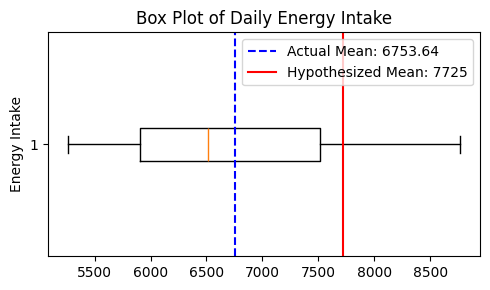

In [3]:
plt.figure(figsize=(5, 3))
plt.boxplot(energyIntake['Energy Intake'], vert=False) #Create a box plot for the energy intake data
plt.title('Box Plot of Daily Energy Intake') #Set the title of the plot
plt.ylabel('Energy Intake') #Set the y-axis label


#Calculate the actual mean of the data
actual_mean = sum(energyIntake['Energy Intake']) / len(energyIntake['Energy Intake']) 
# Add actual mean line
plt.axvline(actual_mean, color='blue', linestyle='--', label=f'Actual Mean: {actual_mean:.2f}')


# Add hypothesized mean line
hypothesized_mean = 7725
plt.axvline(hypothesized_mean, color='red', linestyle='-', label=f'Hypothesized Mean: {hypothesized_mean}')

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()

plt.show() #Display the plot

To know for sure that the data is normally distributed, we need to plot a quantile quantile plot.

If the quantile quantile plot is approximately a straight line then we can say that the data is normally distributed.

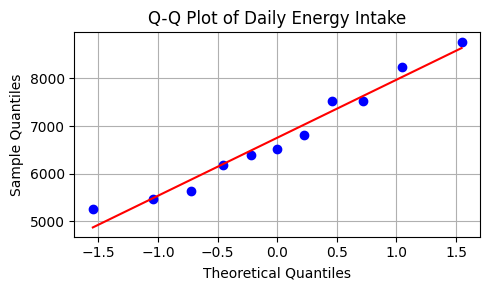

In [4]:

plt.figure(figsize=(5, 3))
stats.probplot(energyIntake['Energy Intake'], dist="norm", plot=plt) #Generating a quantile-quantile plot with a normal distribution
plt.title("Q-Q Plot of Daily Energy Intake") 
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent clipping of labels
plt.show()


**The Data is linear meaning it approximately normally distributed**

_Since we are asked to determine whether the data deviates systematically from the hypothesized mean of 7725_

_A two tail test would be appropriate because we are determing any difference in the hypothesized mean_

In [5]:
sample_mean = energyIntake['Energy Intake'].mean() #Calculate the sample mean using pandas
sample_std = energyIntake['Energy Intake'].std()  #Calculate the sample standard deviation using pandas
n = len(energyIntake['Energy Intake']) #Get the number of samples in the data

standard_error = sample_std / (n ** 0.5) #Calculate the standard error of the mean

t_statistic = (sample_mean - hypothesized_mean) / standard_error #Calculate the t-statistic 
degrees_of_freedom = n - 1 #Calculate the degrees of freedom 

# Create a dictionary to hold the summary statistics
summary_stats = {
    'Statistic': [
        'Sample Mean (kJ)',
        'Sample Standard Deviation (kJ)',
        'Sample Size (n)',
        'Standard Error',
        'T-Statistic',
        'Degrees of Freedom'
    ],
    'Value': [
        sample_mean,
        sample_std,
        n,
        standard_error,
        t_statistic,
        degrees_of_freedom
    ]
}

# Create the pandas DataFrame for the summary statistics
df = pd.DataFrame(summary_stats)

df.head()

,Statistic,Value
0,Sample Mean (kJ),6753.636364
1,Sample Standard Deviation (kJ),1142.123222
2,Sample Size (n),11.000000
3,Standard Error,344.363108
4,T-Statistic,-2.820754


In [6]:
p_val = stats.t.sf(abs(t_statistic), degrees_of_freedom)*2 #calculate the 2-tailed p-value from the t-statistic and degrees of freedom
#stats.t.cdf is only correct if the t-statistic is negative
print(f"P-Value: {p_val:.4f}")

P-Value: 0.0181


**The null hypothesis is rejected because a p-value of 0.0181 is small. this gives strong evidence against the null hypothesis**